In [2]:
import seaborn as sns
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [4]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
#CORELATION:
#corr()====>which col is imprtnt for training a model
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

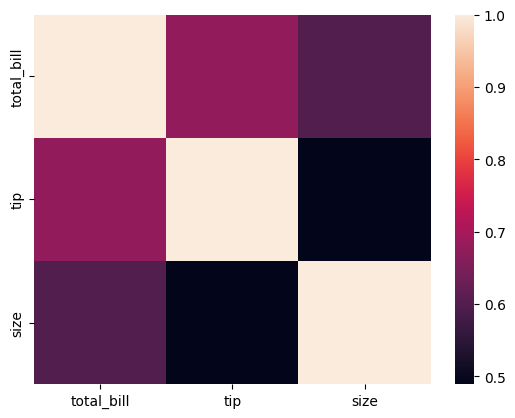

In [6]:
sns.heatmap(df.corr(numeric_only=True))

In [7]:
#joint plot
#numerical columns
#scatterplot====>regline

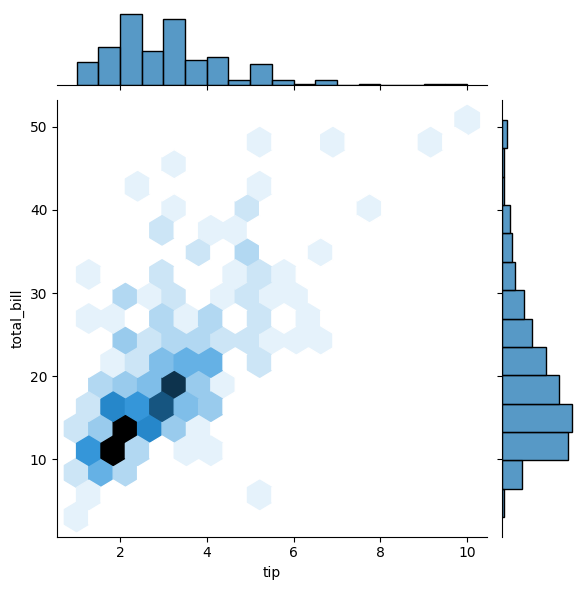

In [8]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='hex')

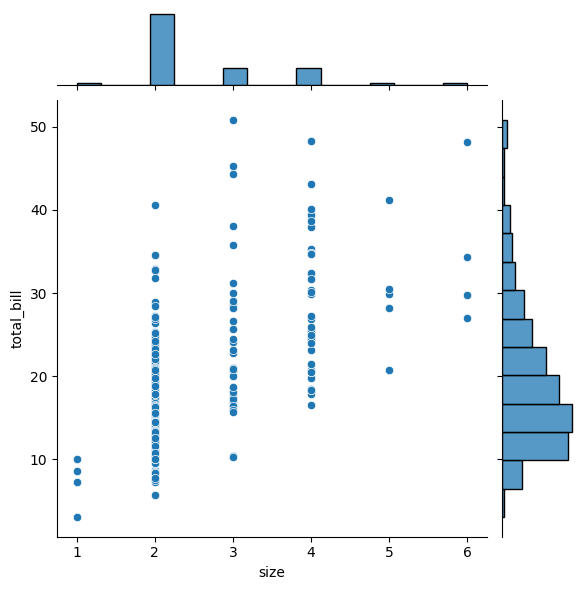

In [9]:
sns.jointplot(x='size',y='total_bill',data=df)

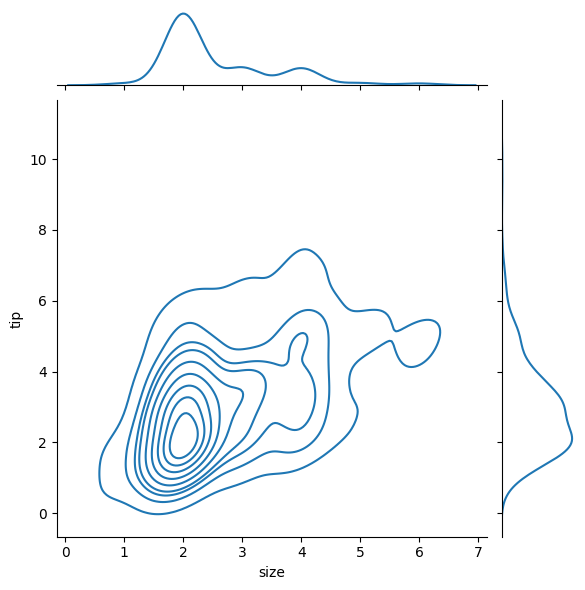

In [10]:
sns.jointplot(x='size',y='tip',data=df,kind='kde')

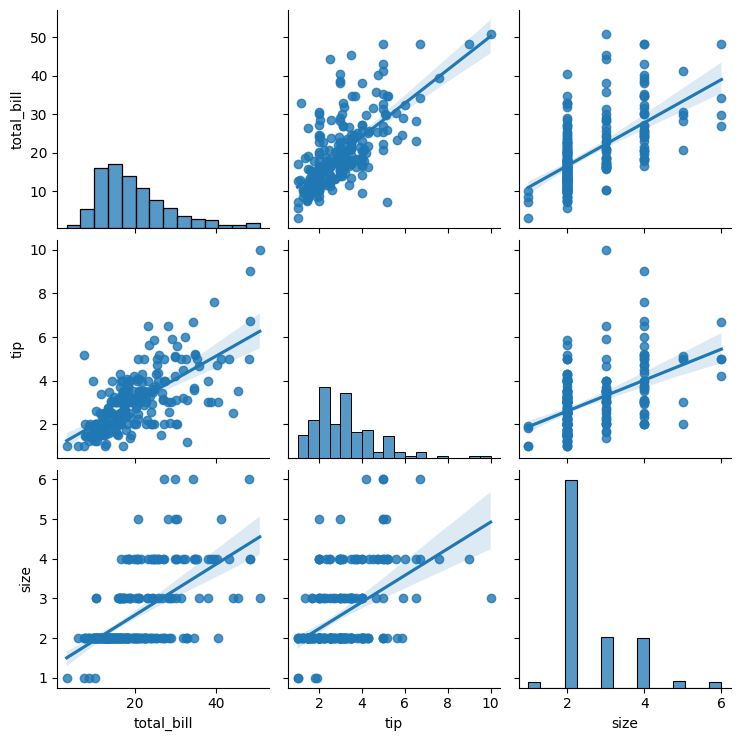

In [11]:
#pair plot
sns.pairplot(df,kind='reg')

In [12]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [14]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [15]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

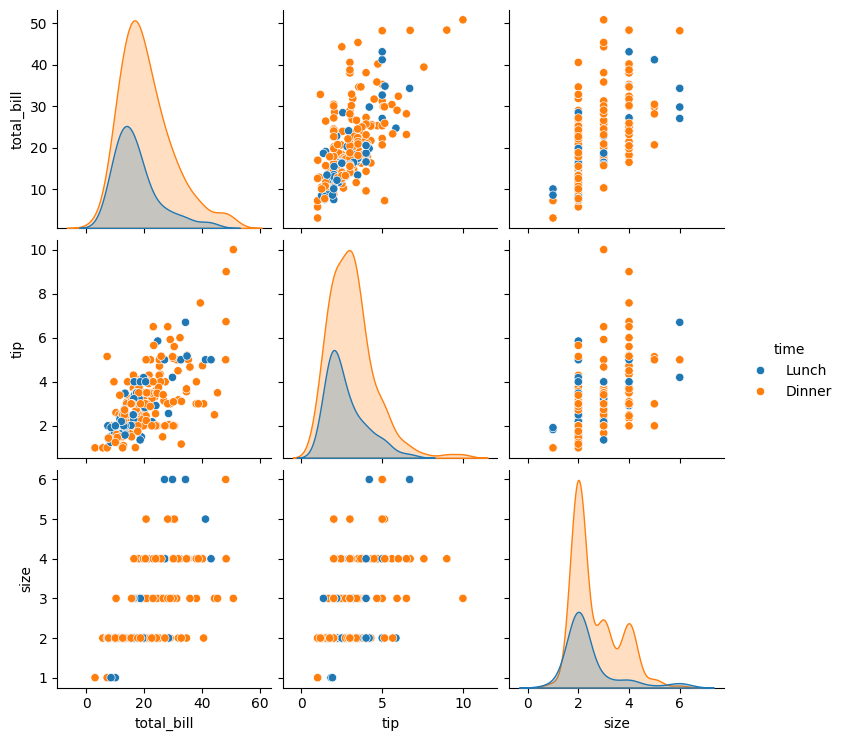

In [16]:
sns.pairplot(df,hue='time')

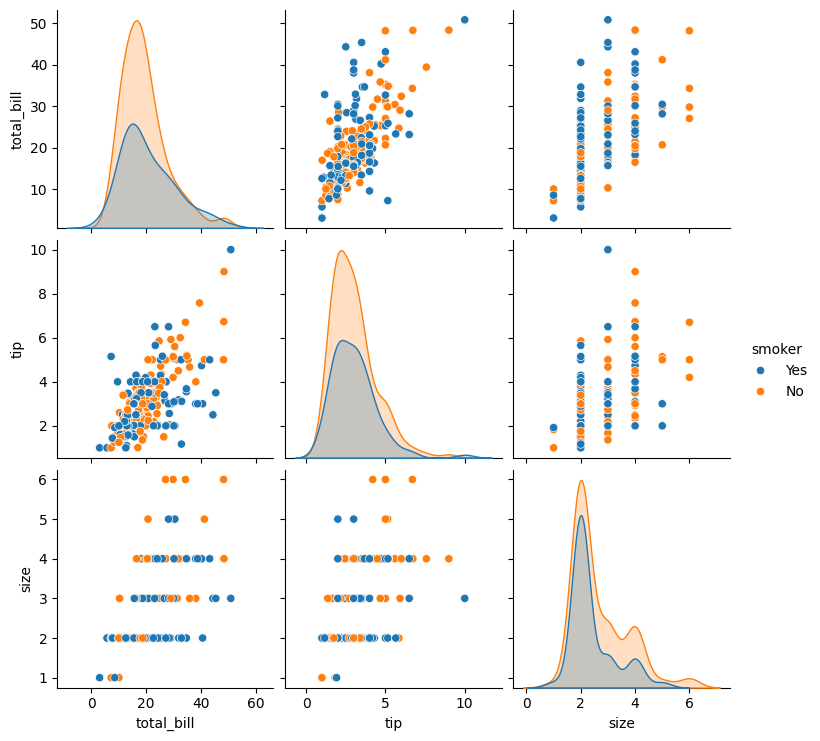

In [17]:
sns.pairplot(df,hue='smoker')

<Axes: xlabel='day', ylabel='count'>

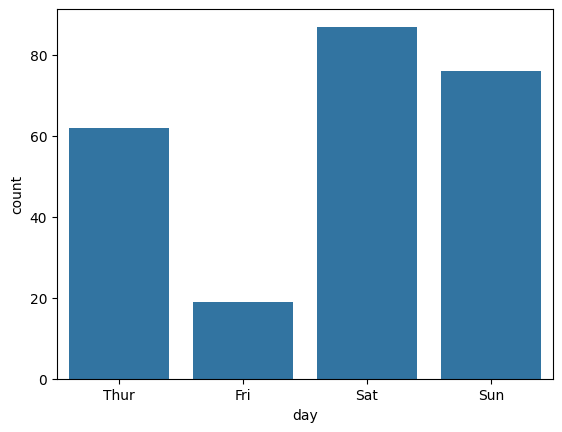

In [18]:
#count plot
sns.countplot(x='day',data=df)

<Axes: xlabel='smoker', ylabel='count'>

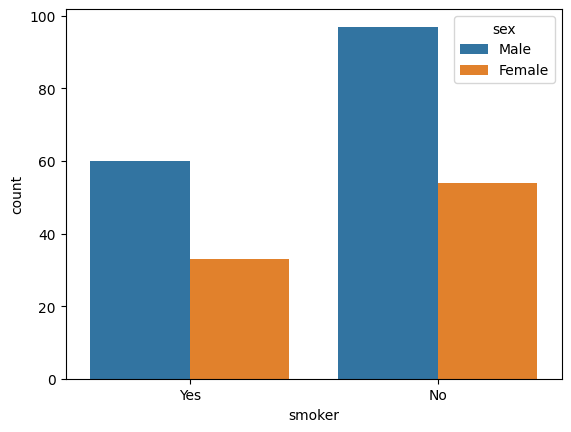

In [19]:
sns.countplot(x='smoker',data=df,hue='sex')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3588\2557175916.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x='day',data=df,hue='sex',color='r')


<Axes: xlabel='day', ylabel='count'>

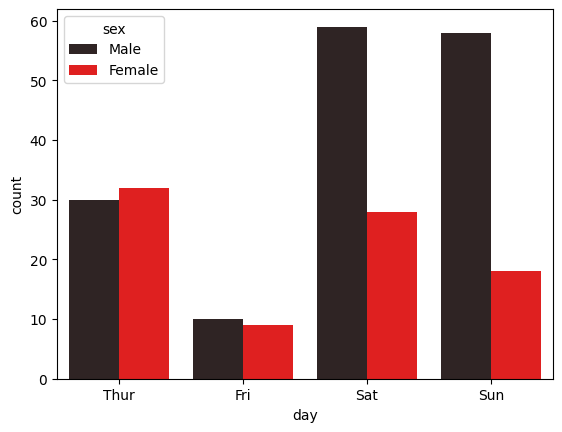

In [20]:
sns.countplot(x='day',data=df,hue='sex',color='r')

<Axes: xlabel='total_bill', ylabel='day'>

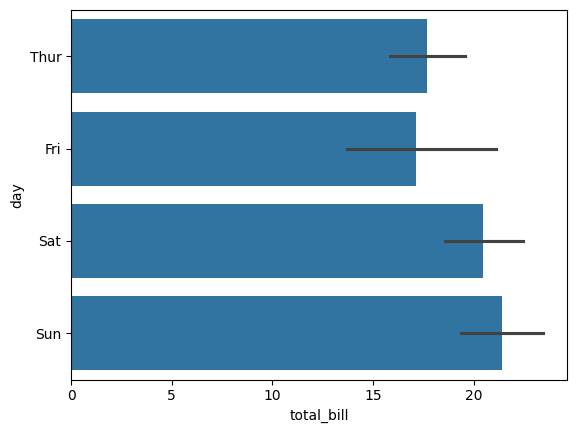

In [21]:
sns.barplot(x='total_bill',y='day',data=df)

<Axes: ylabel='total_bill'>

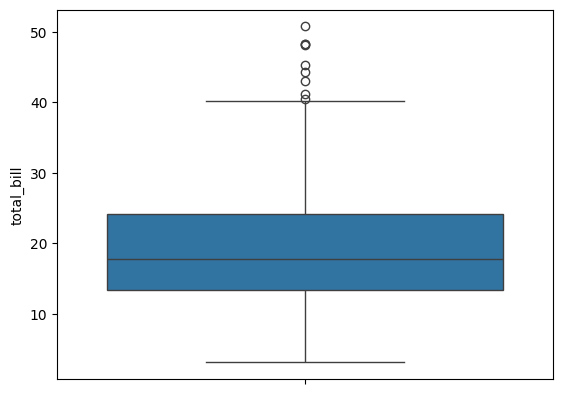

In [22]:
#boxplot
#to find outliers
sns.boxplot(y='total_bill',data=df)

In [23]:
df['total_bill'].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

<Axes: ylabel='tip'>

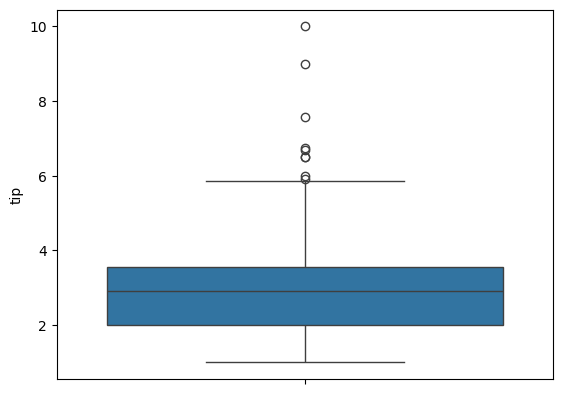

In [24]:
sns.boxplot(y='tip',data=df)

In [25]:
#line===>
# min, 25 percentile(Q1), 50 percentile(Q2), 75 percentile(Q3), max

In [26]:
#3,7,1,1,8,4,6,9
#1,1,3,4    ,6,7,8,9   >>> sorted data
#Median = 4+6/2 =5  Q2
#median = 1+3/2 =2  Q1
#Median = 7+8/2 =7.5 Q3
#IQR(INTER QUARTILE RANGE)==>(Q3-Q1) =7.5-2=5.5
#Top Outliers = (Q3+1.5*IQR)===>=15.75
#Bottom Outliers=(Q1-1.5IQR) =(2-1.5*5.5) =-6.25

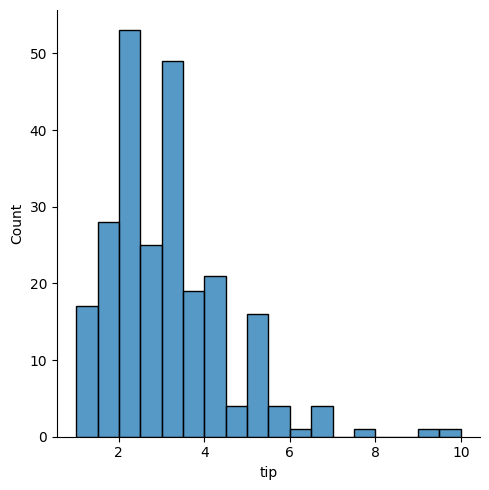

In [31]:
sns.displot(x='tip',data=df)